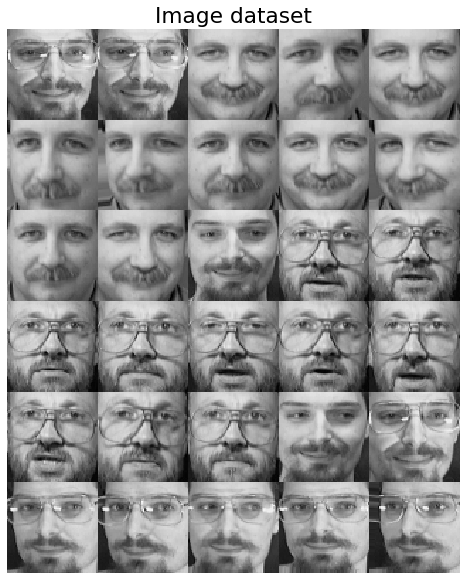

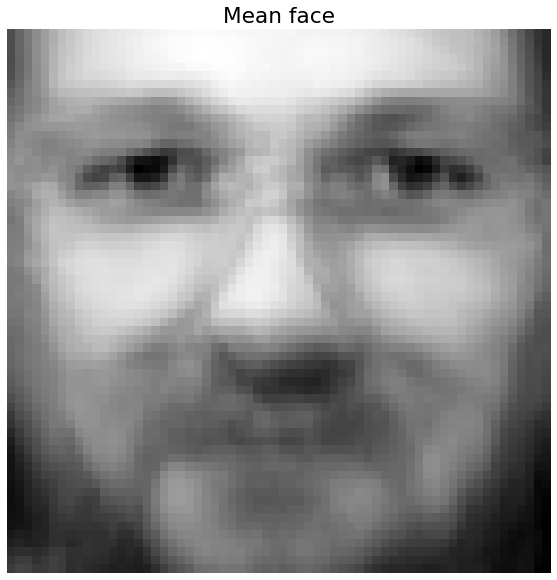

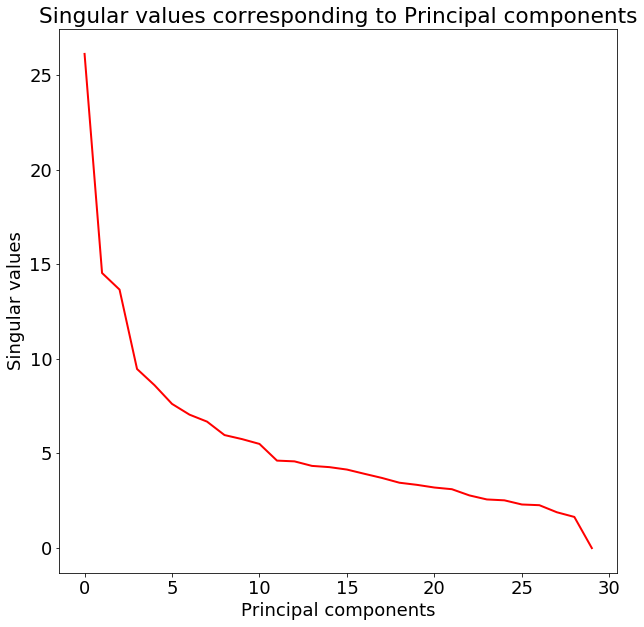

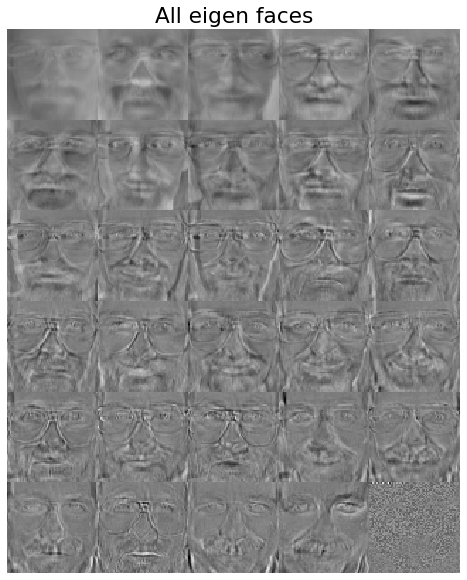

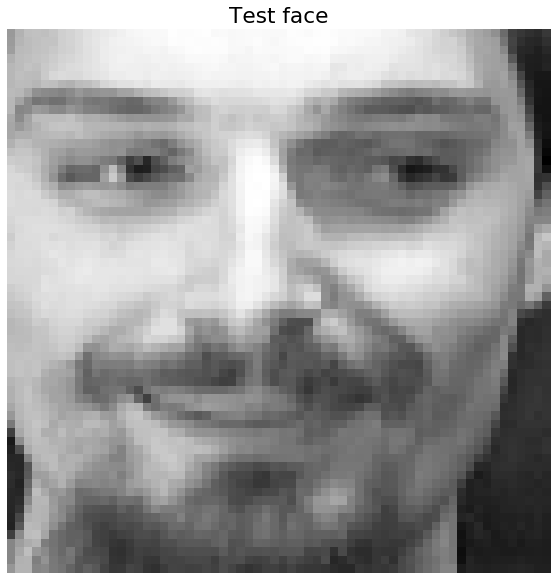

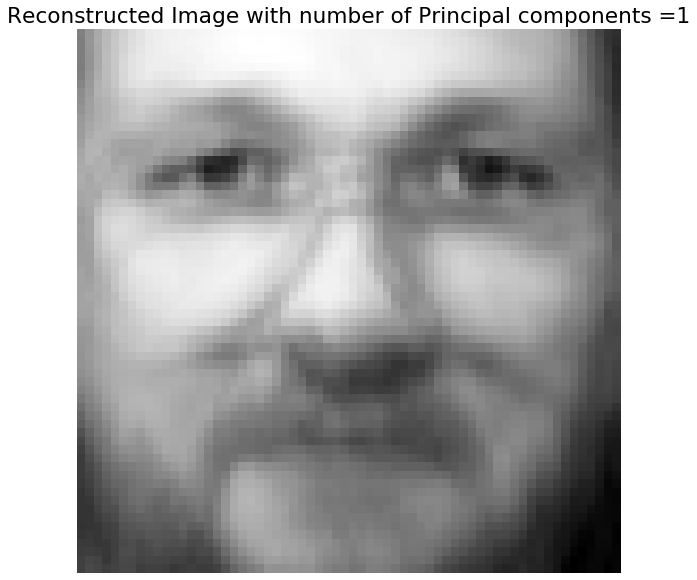

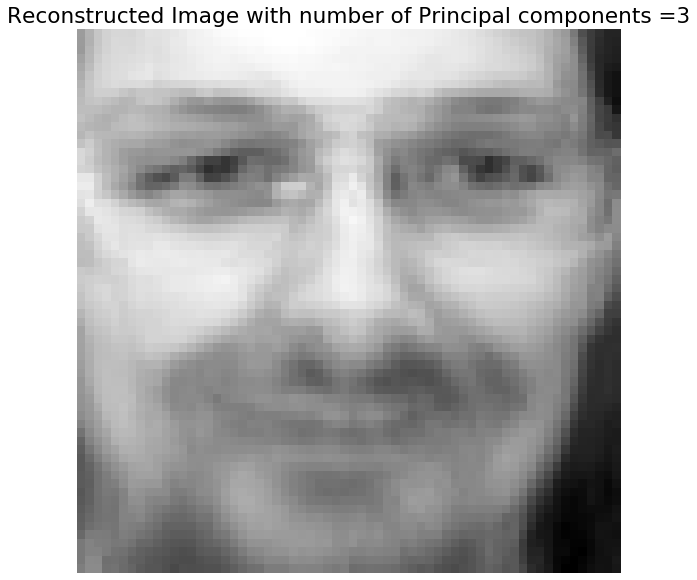

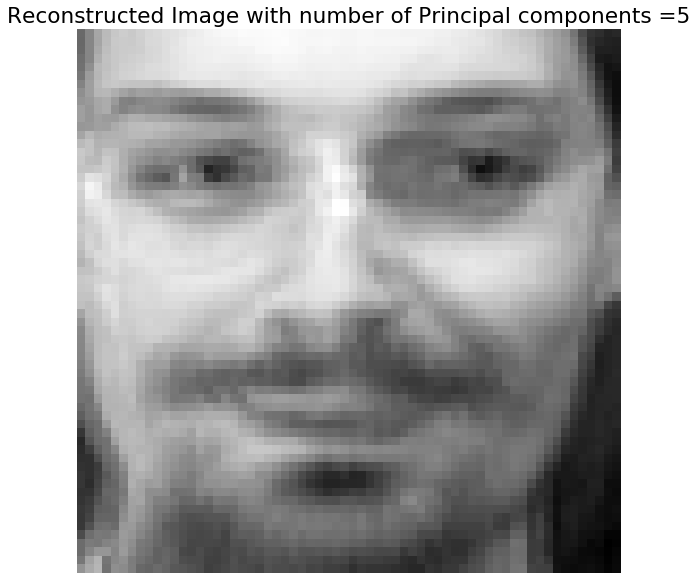

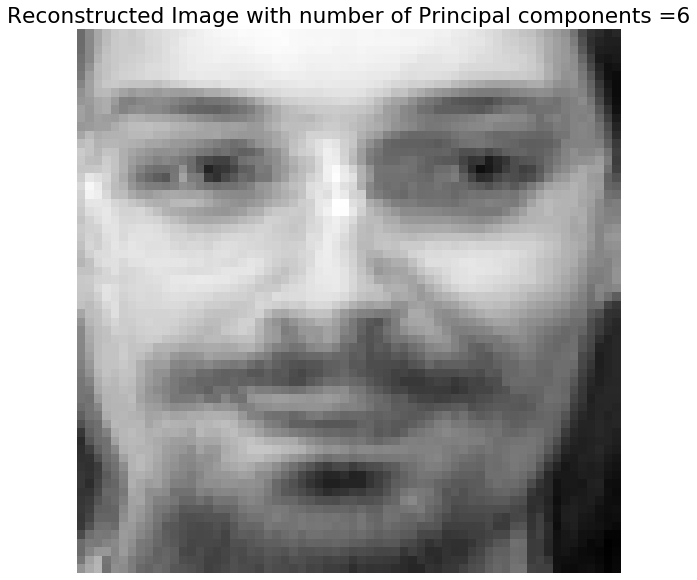

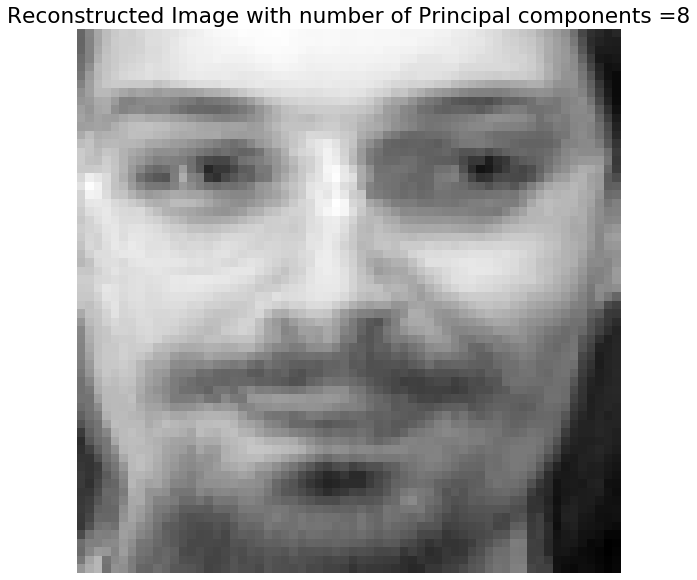

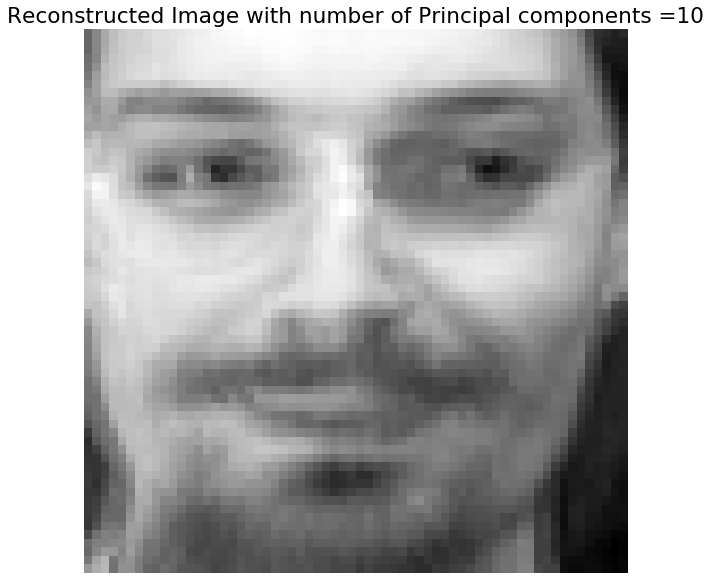

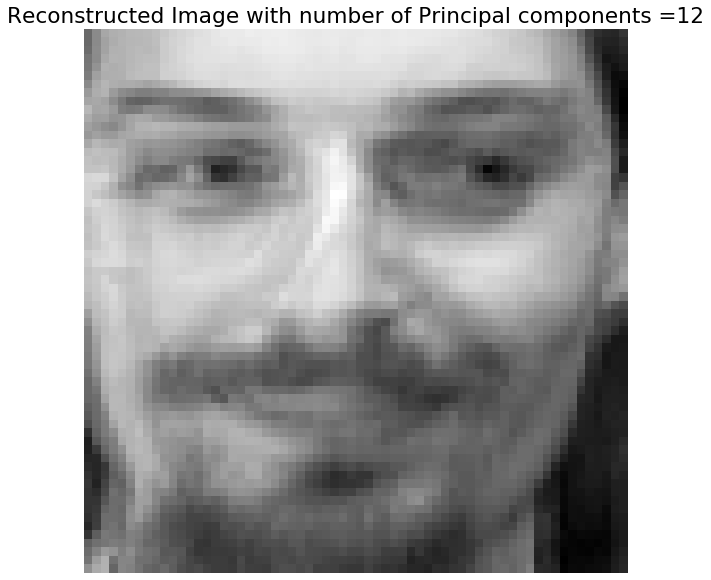

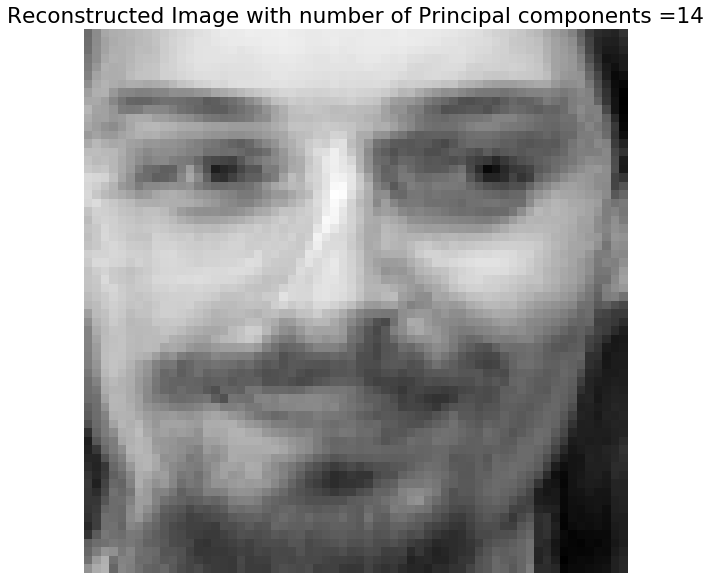

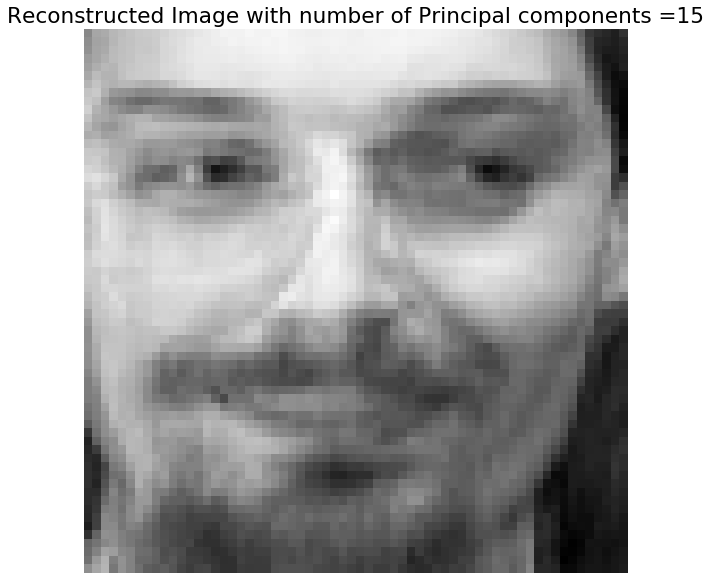

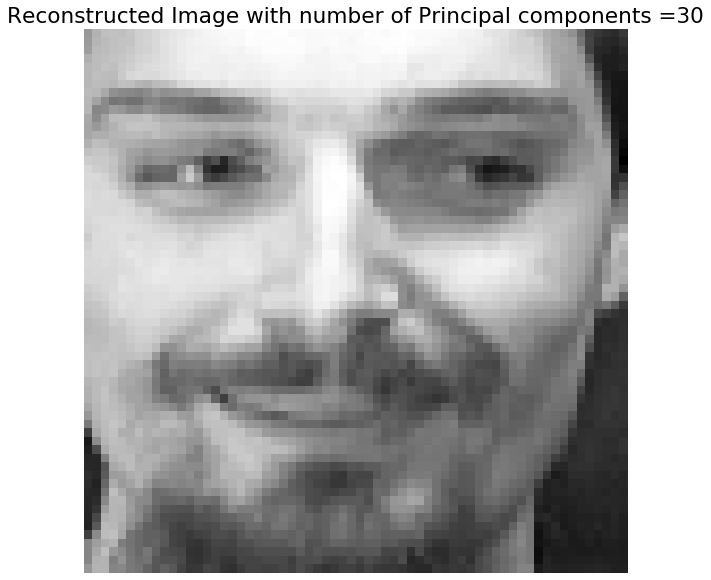

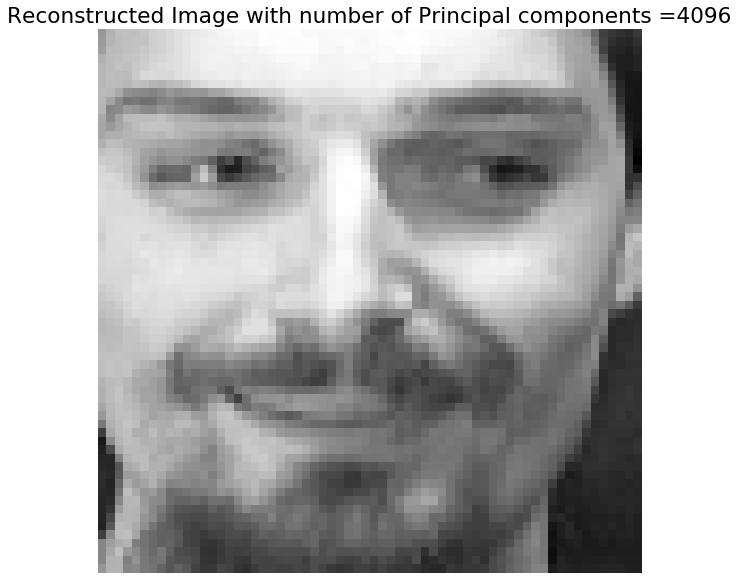

Minimum number of Principal components required for reconstruction, X = 10


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 18})

#===============================================================================================================================
# INPUTS      : images path list , number of images and size of images
# OUTPUT      : Matrix of images(column vectors)
# Description : Function to read images of dimension M x N from dataset 
#               convert each of them into MN x 1 column vector and stack them to form a data matrix 
#===============================================================================================================================

def images_to_matrix(images_path_lst, num_of_images, size_of_images):
    
    mat_of_images = np.zeros((size_of_images,num_of_images)) # dim = 4096 x 30
    
    i = 0
    for image_path in images_path_lst:
        
        # Reading image from the dataset
        image = plt.imread(image_path) # dim = 64 x 64
        
        # converting image into column vector
        image_vec = image.ravel()      # dim = 4096 x 1
        
        mat_of_images[:,i] = image_vec 
        i += 1 
        
    return mat_of_images


#===============================================================================================================================
# INPUT       : Data matrix
# OUTPUT      : left unitary matrix(U), Singular value matrix(diagonal), Mean face of the dataset
# Description : Function to perform PCA(Principal Component Analysis)
#===============================================================================================================================

def PCA(faces):
    
    # calculating mean of the data(faces) matrix
    mean_face_vec = np.mean(faces,1)                   # dim = 4096 x 1
    
    mean_face     = np.resize(mean_face_vec,image_dim) # dim = 64 x 64
    
    # converting mean face vector into matrix
    mean_face_mat = np.asmatrix(mean_face_vec).T       # dim = 4096 x 30
    
    # subtracting the mean from the dataset 
    nfaces = faces - mean_face_mat                     # Zero mean data set (dim = 4096 x 30)
    
    U,S,VT = np.linalg.svd(nfaces, full_matrices=1)    # dim(U) = 4096 x 4096 , dim(S) = 4096 x 30 , dim(VT) = 30 x 30
    
    return U,S,mean_face

#-------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------- Main Program ------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

# Initialization

dir = "GRP_7_Image_dataset"       
num_of_images   = len(os.listdir(dir)) 
M   = 64
N   = 64
image_dim       = (M,N)
size_of_images  = M*N

# Creating list of image paths

images_path_lst = []

for image in os.listdir(dir):
    images_path_lst.append(os.path.join(dir, image))
    
# Function calling 

image_dataset  = [plt.imread(image_path)  for image_path in images_path_lst ]     # list of images in dataset

faces          = images_to_matrix(images_path_lst, num_of_images, size_of_images) # Data matrix

max_rank       = min(size_of_images,num_of_images)                                # Maximum rank of the data(faces) matrix (30)

pr_comps_mat,S,mean_face = PCA(faces)   

# Plotting all images of dataset in 6x5 grid

allimages = np.zeros((M*6,N*5))
count = 0
for j in range(6):
    for k in range(5):
        allimages[j*M : (j+1)*M, k*N : (k+1)*N] = image_dataset[count]
        count += 1

plt.imshow(allimages, cmap='gray')
plt.axis('off')
plt.title('Image dataset')
plt.show()

# Plotting Mean face of the dataset

plt.imshow(mean_face, cmap='gray')
plt.axis('off')
plt.title('Mean face')
plt.show()

# Plotting Singular values corresponding to all significant Principal components

sing_vals = np.diag(S).diagonal()
plt.plot(sing_vals, 'r',linewidth=2)
plt.xlabel('Principal components')
plt.ylabel('Singular values')
plt.title('Singular values corresponding to Principal components')
plt.show()


#cumsum_sing_vals = np.cumsum(sing_vals)
#perc             = cumsum_sing_vals/np.sum(sing_vals)
#plt.plot(perc, 'b',linewidth=2)
#plt.xlabel('principal components')
#plt.ylabel('percentage out of total singular values')
#plt.show()

# Plotting all the significant eigenfaces(faces corresponding to principal components) 
# Here since the maximum rank of the data(faces) matrix is 'max_rank', at maximum we get only 
# 'max_rank' number of singular values and only those principal components corresponding to them are significant

alleigenfaces = np.zeros((M*6,N*5))
count = 0
for j in range(6):
    for k in range(5):
        alleigenfaces[j*M : (j+1)*M, k*N : (k+1)*N] = np.resize(pr_comps_mat[:,count],image_dim)
        count += 1
        
plt.imshow(alleigenfaces, cmap='gray')
plt.axis('off')
plt.title('All eigen faces')
plt.show()

   
# Selecting random image from the dataset for Analysis 

test_face_index = np.random.randint (num_of_images) 
test_face_vec   = faces[:,test_face_index]           # dim = 4096 x 1

#subtracting the mean face from test face
ntest_face_vec= test_face_vec - mean_face.ravel()    # dim = 4096 x 1

# Plotting selected test image

test_face = np.resize(test_face_vec,image_dim)       # dim = 64 x 64
plt.imshow(test_face,cmap='gray')
plt.axis('off')
plt.title('Test face')
plt.show()

# Reconstruting the face using different number of principal components
# To find the minimum number of principal components required for Reconstruction 

num_of_pr_comps_lst=[1,3,5,6,8,10,12,14,15,30,4096]

for num_of_pr_comps in num_of_pr_comps_lst:
    
    # selecting 'num_of_pr_comps' of components out of 4096 components(30 significant components)
    pr_comps = pr_comps_mat[:,:num_of_pr_comps]                        # dim = 4096 x num_of_pr_comps
    
    # Projecting the test face onto 'num_of_pr_comps' principal components to find the co-ordinates
    # and reconstructing the face using those principal components
    recons_face_vec = pr_comps @ pr_comps.T @ ntest_face_vec           # dim = 4096 x 1
    recons_face     = mean_face + np.resize(recons_face_vec,image_dim) # dim = 64 x 64
    
    # Plotting the Renconstructed face
    
    plt.imshow(recons_face,cmap='gray')
    plt.title("Reconstructed Image with number of Principal components =" + str(num_of_pr_comps))
    plt.axis("off")
    plt.show()
    
print("Minimum number of Principal components required for reconstruction, X = 10")    
    
    
    

    
    